## Python statistics essential training - 03_08_email

Standard imports

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

### How I converted my mailbox.

In [3]:
mbox = mailbox.mbox('Sent.mbox')

The resulting object is array-like, with one entry per message. Each entry is dictionary like, with keys corresponding to metadata and data for each message.

In [4]:
mbox[0].keys()

['User-Agent',
 'Date',
 'Subject',
 'From',
 'To',
 'CC',
 'Message-ID',
 'Thread-Topic',
 'References',
 'In-Reply-To',
 'Content-Type',
 'Content-Transfer-Encoding',
 'MIME-Version']

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module `csv` to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [ ]:
with open('mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subject','from','to','date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

All done! Thanks to Justin Ellis for inspiration with https://jellis18.github.io/post/2018-01-17-mail-analysis.

## Moving on!

In [5]:
messages = pd.read_csv('mbox-anonymized.csv')

In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1030 non-null   object
 1   from     1029 non-null   object
 2   to       1030 non-null   object
 3   date     1030 non-null   object
dtypes: object(4)
memory usage: 32.3+ KB


In [7]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [8]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [9]:
re.search('<(.+)>',messages['from'][0])

<re.Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [13]:
re.search('<(.+)>',messages['from'][0]).groups()

('Michele.Vallisneri@jpl.nasa.gov',)

In [14]:
re.search('<(.+)>',messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [15]:
re.search('<(.+)>',messages['from'][0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [16]:
re.search('<(.+)>','Michele.Vallisneri@jpl.nasa.gov').group(1)

AttributeError: 'NoneType' object has no attribute 'group'

In [17]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [18]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [19]:
messages['from'] = messages['from'].apply(clean_address)

TypeError: expected string or bytes-like object

In [20]:
%debug

> c:\users\sp\anaconda3\lib\re.py(201)search()
    199     """Scan through string looking for a match to the pattern, returning
    200     a Match object, or None if no match was found."""
--> 201     return _compile(pattern, flags).search(string)
    202 
    203 def sub(pattern, repl, string, count=0, flags=0):

ipdb> up
> <ipython-input-17-90e4d68109af>(2)clean_address()
      1 def clean_address(raw):
----> 2     match = re.search('<(.+)>',raw)
      3 
      4     if match is None:
      5         return raw

ipdb> print(raw)
nan
ipdb> quit


In [21]:
messages['from'] = messages['from'].dropna().apply(clean_address)
messages['to'] = messages['to'].dropna().apply(clean_address)

In [22]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [23]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [25]:
pd.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles')

TypeError: Cannot localize tz-aware Timestamp, use tz_convert for conversions

In [26]:
%debug

> c:\users\sp\downloads\python statistics essential training\exercise files\chapter3\03_08\pandas\_libs\tslibs\timestamps.pyx(836)pandas._libs.tslibs.timestamps.Timestamp.tz_localize()

ipdb> up
> <ipython-input-25-d2ff3badbc47>(1)<module>()
----> 1 pd.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles')

ipdb> up
*** Oldest frame
ipdb> up
*** Oldest frame
ipdb> down
> c:\users\sp\downloads\python statistics essential training\exercise files\chapter3\03_08\pandas\_libs\tslibs\timestamps.pyx(836)pandas._libs.tslibs.timestamps.Timestamp.tz_localize()

ipdb> print(pd.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles'))
*** NameError: name 'pd' is not defined
ipdb> print(pandas.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles')
*** SyntaxError: unexpected EOF while parsing
ipdb> pd.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles')
*** NameError: name 'pd

In [27]:
pd.to_datetime(messages['date'][0]).tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [29]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [30]:
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [31]:
messages.date.min(), messages.date.max()

(Timestamp('2017-06-30 23:26:52-0700', tz='America/Los_Angeles'),
 Timestamp('2018-05-13 08:40:20-0700', tz='America/Los_Angeles'))

In [60]:
messages.date.dt.weekday.head(20)

0     0
1     0
2     1
3     4
4     0
5     0
6     2
7     1
8     2
9     3
10    0
11    0
12    1
13    4
14    0
15    1
16    2
17    1
18    4
19    3
Name: date, dtype: int64

In [61]:
messages.date.dt.weekday.unique()

array([0, 1, 4, 2, 3, 5, 6], dtype=int64)

In [62]:
messages['dayofweek'] = pd.Categorical(messages.date.dt.weekday,
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [64]:
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
messages['dayofweek'] = messages['date'].dt.weekday.map(days)

In [65]:
messages['dayofweek']

0          Monday
1          Monday
2         Tuesday
3          Friday
4          Monday
          ...    
1025       Monday
1026      Tuesday
1027      Tuesday
1028    Wednesday
1029     Thursday
Name: dayofweek, Length: 1030, dtype: object

In [66]:
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [67]:
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25 

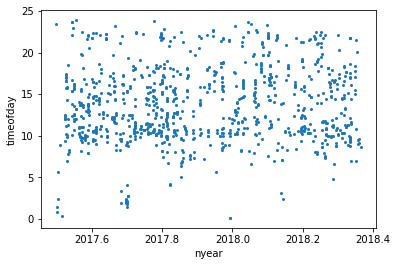

In [68]:
messages.plot.scatter('nyear','timeofday',s=4)

In [54]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 14:18:46-08:00,NaN,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-26 18:38:16-07:00,NaN,18.633333,2018.234843
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 14:54:50-08:00,NaN,14.900000,2018.122165
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 11:40:04-08:00,NaN,11.666667,2018.072515
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-30 17:13:00-07:00,NaN,17.216667,2017.831533


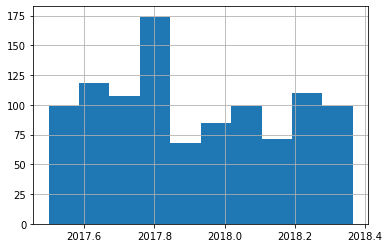

In [49]:
messages.nyear.hist()

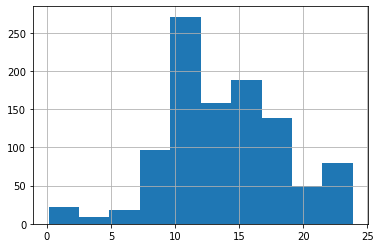

In [50]:
messages.timeofday.hist()

In [69]:
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

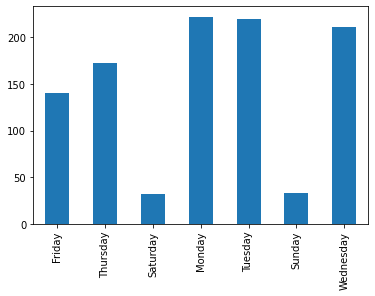

In [77]:
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')